<a href="https://colab.research.google.com/github/MalihaUCF/Machine-Learning-Course-Assignments--Spring-2019/blob/master/Assignment1/Problem2/Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Data Shape (60000, 28, 28)
Test Data Shape (10000, 28, 28)
The train and test labels look like this, (60000,) (10000,)
X-shape- (784, 60000)
Y-shape- (60000,)
Y-reshape- (1, 60000)
Y-reshape- (1, 10000)


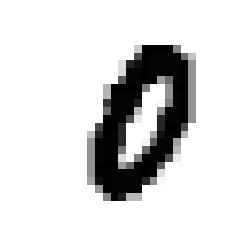

[1.]
[0.]
Epoch 0 cost:  9.774314039767166
Epoch 100 cost:  8.407160079148722
Epoch 200 cost:  8.028138750740604
Epoch 300 cost:  7.857687210188187
Epoch 400 cost:  7.775307676415072
Epoch 500 cost:  7.7347355386649905
Epoch 600 cost:  7.715373795085269
Epoch 700 cost:  7.707261843878045


In [0]:
#code  with square error and mini batch except Testing part



from keras.datasets import mnist
import numpy as np

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()  



print('Training Data Shape',train_images.shape)
print('Test Data Shape',test_images.shape)
print('The train and test labels look like this,' ,train_labels.shape,test_labels.shape)

#modifying class labels
y_new = np.zeros(train_labels.shape)
y_new[np.where(train_labels == 0.0)[0]] = 1
train_labels = y_new

#print(y_train[:,7])
#print(train_labels[0,1])

y_new = np.zeros(test_labels.shape)
y_new[np.where(test_labels == 0.0)[0]] = 1
test_labels = y_new



train_images = train_images.reshape(60000, 28*28) 
test_images = test_images.reshape(10000, 28*28)


train_images = train_images.T 
test_images=test_images.T

 
train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 
train_images /= 255 
test_images /= 255


print('X-shape-',train_images.shape)
print('Y-shape-',train_labels.shape)

train_labels, test_labels = train_labels.reshape(1,60000),test_labels.reshape(1,10000)

print('Y-reshape-',train_labels.shape)
print('Y-reshape-',test_labels.shape)


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 34
plt.imshow(train_images[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(train_labels[:,i])
print(train_labels[:,8])


def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

  
def compute_loss(Y, Y_hat):  #binary cross entropy

  m = Y.shape[1]
  L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

  return L


def squared_loss(Y,A):   # mean square error
  
  m =  m = Y.shape[1]
  L = np.square(Y - A).mean()
 
    
  return L



def mini_batches(X, Y, batchsize):
    for start_idx in range(0, X.shape[0] - batchsize + 1, batchsize):
        excerpt = slice(start_idx, start_idx + batchsize)
        yield X[excerpt], Y[excerpt]
        



learning_rate = 1
batch_size=32
costs = []

X = train_images
Y = train_labels

n_x = X.shape[0]
m = X.shape[1]

#W = np.random.randn(n_x, 1) * 0.01
#b = np.zeros((1, 1))

W = np.zeros(shape=(n_x,1))
b = 0
        
for i in range(1000):
  
  
  for batch in mini_batches(X.T, Y.T, batch_size):
    
      x_batch, y_batch = batch
      
      Z = np.matmul(W.T, x_batch.T) + b
      A = sigmoid(Z)
      
      cost = compute_loss(y_batch.T, A)     #binary cross entropy
      #cost=squared_loss(y_batch.T,A)  

      dW = (1/m) * np.matmul(x_batch.T, (A-y_batch).T)
      db = (1/m) * np.sum(A-y_batch.T, axis=1, keepdims=True)

      W = W - learning_rate * dW
      b = b - learning_rate * db

  costs.append(cost)   
      
  if (i % 100 == 0):
      print("Epoch", i, "cost: ", cost)
      
print("Final cost:", cost)




In [0]:
#Clean Space - code with test and all without minibatch though



from keras.datasets import mnist
import numpy as np

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()  



print('Training Data Shape',train_images.shape)
print('Test Data Shape',test_images.shape)
print('The train and test labels look like this,' ,train_labels.shape,test_labels.shape)

#modifying class labels
y_new = np.zeros(train_labels.shape)
y_new[np.where(train_labels == 0.0)[0]] = 1
train_labels = y_new

#print(y_train[:,7])
#print(train_labels[0,1])

y_new = np.zeros(test_labels.shape)
y_new[np.where(test_labels == 0.0)[0]] = 1
test_labels = y_new



train_images = train_images.reshape(60000, 28*28) 
test_images = test_images.reshape(10000, 28*28)


train_images = train_images.T 
test_images=test_images.T

 
train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 
train_images /= 255 
test_images /= 255


print('X-shape-',train_images.shape)
print('Y-shape-',train_labels.shape)

train_labels, test_labels = train_labels.reshape(1,60000),test_labels.reshape(1,10000)

print('Y-reshape-',train_labels.shape)
print('Y-reshape-',test_labels.shape)


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 34
plt.imshow(train_images[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(train_labels[:,i])
print(train_labels[:,8])


def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

  
def compute_loss(Y, Y_hat):  #binary cross entropy

  m = Y.shape[1]
  L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

  return L






learning_rate = 1

X = train_images
Y = train_labels

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(1000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)   #binary cross entropy

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)



from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, test_images) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (test_labels == 1)[0,:]

print(confusion_matrix(predictions, labels))


print(classification_report(predictions, labels))